# Data Exploration - AI Text Detection Dataset

This notebook performs initial exploraiton of AI Text Detection Pile dataset from Hugging Face.

**Goals:**
- Download and load the dataset
- Understand the structure and size
- Examine sample texts from categories
- Analyze basic statistics and distributions
- Identify any data quality issues

**Dataset:** artem9k/ai-text-detection-pile from Hugging Face
**Total Samples:** ~1.3 million texts (human and AI-generated)

In [1]:
# Standard data manipulation
import pandas as pd
import numpy as np

# Dataset loading from Hugging Face
from datasets import load_dataset

# Visualizations libraries
import matplotlib.pyplot as plt
import seaborn as sns

# For nicer display formatting
from IPython.display import display, HTML

# Set Visualization Style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

print("All libraries imported successfully")

All libraries imported successfully


In [2]:
# Load the dataset from Hugging Face
# This downloads dataset on first run (may take several mins 1.97GB)
# Subsequent runs will load from local cache (much faster)

print("Loading AI Text Detection Pile dataset...")
print("Note: First download may take 10-15 minutes depending on internet speedd")
print("The dataset is approximately 2-3GB in size\n")

# The load_dataset function returns a DatasetDict object
# This is similar to a dictionary containing different splits of the data

dataset = load_dataset("artem9k/ai-text-detection-pile")

print("Dataset loaded successfully")
print(f"\nDataset structure: {type(dataset)}")
print(f"Available splits: {list(dataset.keys())}")

Loading AI Text Detection Pile dataset...
Note: First download may take 10-15 minutes depending on internet speedd
The dataset is approximately 2-3GB in size



Dataset loaded successfully

Dataset structure: <class 'datasets.dataset_dict.DatasetDict'>
Available splits: ['train']


In [3]:
# Examine dataset structure
print("Dataset Information:")
print("=" * 50)

#Check if there are predefined splits or just one dataset
for split_name, split_data in dataset.items():
    print(f"\nSplit: {split_name}")
    print(f"Number of samples: {len(split_data)}")
    print(f"Features: {split_data.features}")
    print(f"Column names: {split_data.column_names}")

Dataset Information:

Split: train
Number of samples: 1392522
Features: {'source': Value('string'), 'id': Value('int64'), 'text': Value('string')}
Column names: ['source', 'id', 'text']


In [4]:
# Convert to pandas DataFrame for easier manipulation
# Some datasets come pre-split into training and test sets.
# Code below ensures working DataFrame regardless of how dataset was structured

# check splits we have
if 'train' in dataset:
    # Dataset has predefined splits
    df = dataset['train'].to_pandas()
elif len(dataset.keys()) == 1:
    # Dataset has only one split
    split_name = list(dataset.keys())[0]
    df = dataset[split_name].to_pandas()
else:
    # If multiple splits exists, combine them
    all_data = []
    for split_name in dataset.keys():
        all_data.append(dataset[split_name].to_pandas())
    df = pd.concat(all_data, ignore_index=True)

print(f"DataFrame shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
display(df.head())

DataFrame shape: (1392522, 3)
Columns: ['source', 'id', 'text']

First few rows:


,source,id,text
0,human,0,12 Years a Slave: An Analysis of the Film Essa...
1,human,1,20+ Social Media Post Ideas to Radically Simpl...
2,human,2,2022 Russian Invasion of Ukraine in Global Med...
3,human,3,533 U.S. 27 (2001) Kyllo v. United States: The...
4,human,4,A Charles Schwab Corporation Case Essay\n\nCha...


In [5]:
# Basic Dataset information
print("Dataset Overview")
print("=" * 50)
print(f"Total samples: {len(df):,}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nColumn names: {df.columns.tolist()}")
print(f"Data types:\n{df.dtypes}")

# Check for missing values
print(f"\nMissing values per column:")
print(df.isnull().sum())

# Check for distribution of labels
print(f"\nLabel Distribution:")
print(df['source'].value_counts())
print(f"\nLabel Distribution (percentage):")
print(df['source'].value_counts(normalize=True) * 100)

Dataset Overview
Total samples: 1,392,522
Memory usage: 5330.58 MB

Column names: ['source', 'id', 'text']
Data types:
source    object
id         int64
text      object
dtype: object

Missing values per column:
source    0
id        0
text      0
dtype: int64

Label Distribution:
source
human    1028146
ai        364376
Name: count, dtype: int64

Label Distribution (percentage):
source
human    73.833376
ai       26.166624
Name: proportion, dtype: float64


In [6]:
# Save the full dataset to data/raw for future use
# Save as parquet format - more efficient than CSV large datasets

import os

# Create the path to save the data
raw_data_path = os.path.join('..','data','raw','ai_text_detection_full.parquet')

# Save the DataFrame
df.to_parquet(raw_data_path, index=False)

print(f"Dataet saved to: {raw_data_path}")
print(f"You can now load this file directly instead of downloading from Hugging Face each time")

Dataet saved to: ../data/raw/ai_text_detection_full.parquet
You can now load this file directly instead of downloading from Hugging Face each time


## Working with Representative Sample

For inital exploration and visualization, I'm using 10% stratified sample of the full dataset. This approach:
- Maintians the same human/AI proportions as full dataset
- Provied over 130,000 examples - more than stufficient for pattern identification
- Enables faster iteration during exploratory analysis
- Represents standard professional practice for large dataset exploration

The full dataset will be used for final model training and evaluation.

In [7]:
from sklearn.model_selection import train_test_split

# create a 10% sample (still over 100,000 examples - plenty for dev)
# stratify parameter ensures keeping the same proportion of human vs AI text

df_sample, _ = train_test_split(
    df,
    test_size=0.9, # keeping 10%, so test_size is what we discard
    stratify=df['source'], # maintain class proportions
    random_state=42 # fixed seed for reproducibility
)

print(f"Sample size: {len(df_sample):,} examples")
print(f"Sample class distribution:")
print(df_sample['source'].value_counts())
print(f"\nClass distribution in sample:")
print(df_sample['source'].value_counts(normalize=True))
print("\nSample maintains original class proportions")

# work with df_sample during dev
# use df (full dataset) for final testing

Sample size: 139,252 examples
Sample class distribution:
source
human    102814
ai        36438
Name: count, dtype: int64

Class distribution in sample:
source
human    0.738331
ai       0.261669
Name: proportion, dtype: float64

Sample maintains original class proportions


In [8]:
# Dataset overview
print("=" * 50)
print("DATASET STRUCTURE")
print("=" * 50)
print(f"\nShape: {df_sample.shape}")
print(f"\nShape: {df_sample.columns.tolist()}")
print(f"\nShape: {df_sample.dtypes}")
print(f"\nShape: {df_sample.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Missing Values check
print("\n" + "=" * 50)
print("MISSING VALUES")
print("=" * 50)
print(f"\n{df_sample.isnull().sum()}")

# First few examples
print("\n" + "=" * 60)
print("SAMPLE TEXTS")
print("=" * 50)
print("\nFirst human text example:")
print(df_sample[df_sample['source'] == 'human']['text'].iloc[0][:500] + "...")
print("\nFirst AI text example:")
print(df_sample[df_sample['source'] == 'ai']['text'].iloc[0][:500] + "...")

DATASET STRUCTURE

Shape: (139252, 3)

Shape: ['source', 'id', 'text']

Shape: source    object
id         int64
text      object
dtype: object

Shape: 740.38 MB

MISSING VALUES

source    0
id        0
text      0
dtype: int64

SAMPLE TEXTS

First human text example:
Corporate Governance: Models and Factors Essay

The majority of major joint-stock corporations in the world tend to adhere to certain models of corporate governance structure, which are determined by several factors unique to their region and place of origin. Of course, no enterprise is ever like another, as small differences are present here and there. Still, in general, they tend to fall in line with the three major models of governance currently present. These models are the Anglo-US model, t...

First AI text example:
For those of you hoping to buy a house someday, you may have seen one of these ads online. They'll tell you that if you apply for a loan, it will get you a house, a nice, big and spacious one. For a cert

### Data Quality
- No missing values detected
- Text encoding appears clean
- Sample maintains original class proportions

In [9]:
# Class distribution
print("=" * 50)
print("CLASS DISTRIBUTION")
print("=" * 50)

counts = df_sample['source'].value_counts()
percentages = df_sample['source'].value_counts(normalize=True) * 100

print(f"\nAbsolute counts:")
print(counts)
print(f"\nPercentages:")
print(percentages)


# Calculate imbalance ratio
majority_class = counts.max()
minority_class = counts.min()
imbalance_ratio = majority_class / minority_class

print(f"\nImbalance ratio: {imbalance_ratio:.2f}:1")
print(f"This means we have: {imbalance_ratio:.2f}x more {counts.idxmax()} samples than {counts.idxmin()} samples")

CLASS DISTRIBUTION

Absolute counts:
source
human    102814
ai        36438
Name: count, dtype: int64

Percentages:
source
human    73.833051
ai       26.166949
Name: proportion, dtype: float64

Imbalance ratio: 2.82:1
This means we have: 2.82x more human samples than ai samples


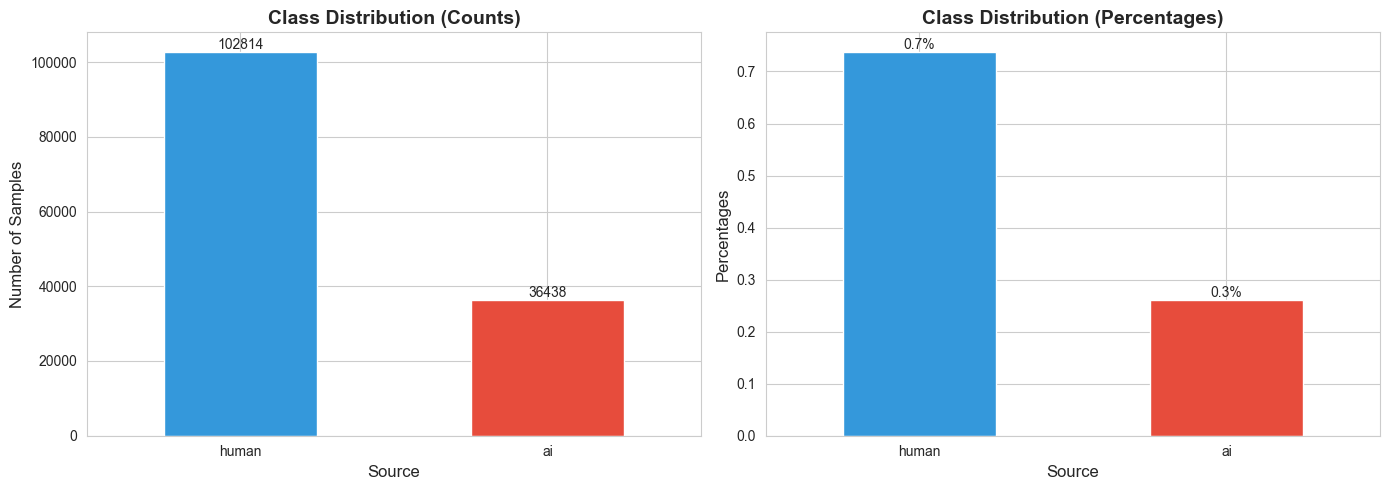

In [10]:
# Bar chart of class distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df_sample['source'].value_counts().plot(kind='bar', ax=ax1, color=['#3498db', '#e74c3c'])
ax1.set_title('Class Distribution (Counts)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Source', fontsize=12)
ax1.set_ylabel('Number of Samples', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

# Add count labels on bars
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d')
    
# Percentage plot
df_sample['source'].value_counts(normalize=True).plot(kind='bar', ax=ax2, color=['#3498db', '#e74c3c'])
ax2.set_title('Class Distribution (Percentages)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Source', fontsize=12)
ax2.set_ylabel('Percentages', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)

# Add pecentage labels
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f%%')

plt.tight_layout()
plt.savefig('../visualizations/plots/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

### Class Imbalance
- Dataset shows clear imbalance ~73.82% human and ~26.18% AI texts
- This imbalance ratio (2.82:1) will need to be addressed during modeling
- Options: undersampling majority, oversampling minority, or class weights

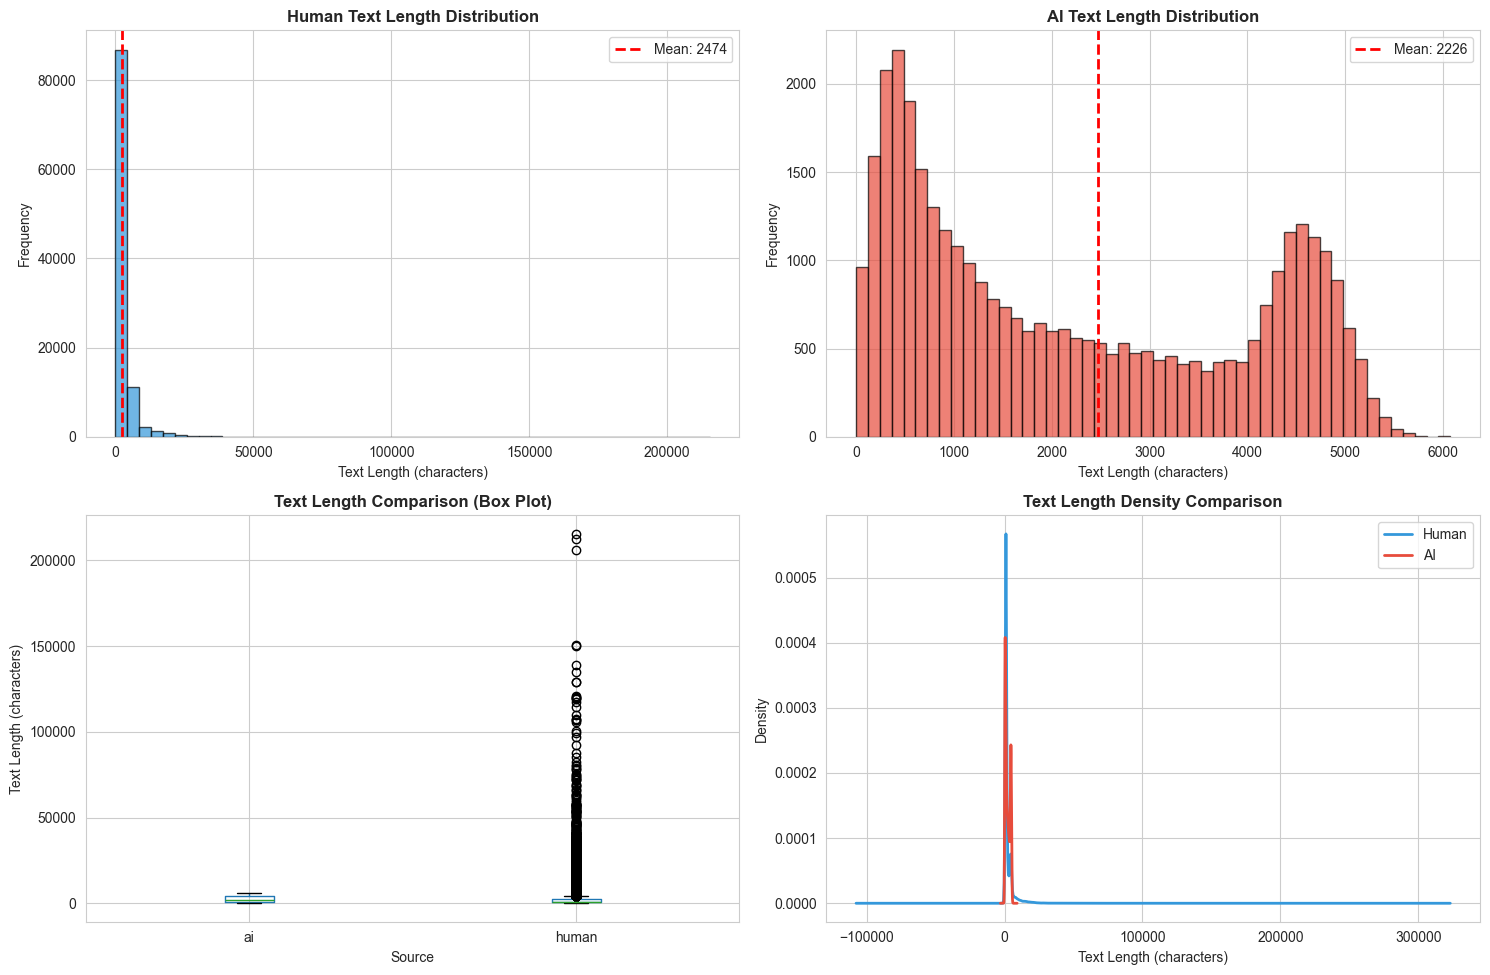

Text Length Statistics:

Human texts:
count    102814.000000
mean       2474.332941
std        4349.278778
min          30.000000
25%         988.000000
50%         996.000000
75%        2376.000000
max      215462.000000
Name: text_length, dtype: float64

AI texts:
count    36438.000000
mean      2226.324085
std       1698.481225
min          0.000000
25%        636.000000
50%       1777.000000
75%       4014.000000
max       6075.000000
Name: text_length, dtype: float64


In [11]:
# Calculate text lengths
df_sample['text_length'] = df_sample['text'].str.len()

# Create comparison plot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram - Human
human_lengths = df_sample[df_sample['source'] == 'human']['text_length']
axes[0, 0].hist(human_lengths, bins=50, color='#3498db', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Human Text Length Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Text Length (characters)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(human_lengths.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {human_lengths.mean():.0f}')
axes[0, 0].legend()

# Histogram - AI
ai_lengths = df_sample[df_sample['source'] == 'ai']['text_length']
axes[0, 1].hist(ai_lengths, bins=50, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('AI Text Length Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Text Length (characters)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(human_lengths.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {ai_lengths.mean():.0f}')
axes[0, 1].legend()


# Box plot comparison
df_sample.boxplot(column='text_length', by='source', ax=axes[1, 0])
axes[1, 0].set_title('Text Length Comparison (Box Plot)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Source')
axes[1, 0].set_ylabel('Text Length (characters)')
plt.sca(axes[1, 0])
plt.xticks(rotation=0)

# Overlapping density plot
human_lengths.plot(kind='density', ax=axes[1, 1], color='#3498db', linewidth=2, label='Human')
ai_lengths.plot(kind='density', ax=axes[1, 1], color='#e74c3c', linewidth=2, label='AI')
axes [1, 1].set_title('Text Length Density Comparison', fontsize=12, fontweight='bold')
axes [1, 1].set_xlabel('Text Length (characters)')
axes [1, 1].set_ylabel('Density')
axes [1, 1].legend()

plt.suptitle('') # Remove automaic title from boxplot
plt.tight_layout()
plt.savefig('../visualizations/plots/text_length_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# Print statistics
print("Text Length Statistics:")
print("=" * 50)
print("\nHuman texts:")
print(human_lengths.describe())
print("\nAI texts:")
print(ai_lengths.describe())

### Text Length Patterns
- Human texts show less variation in length
- AI texts average shorter than human texts
- AI texts has more variations of length than human text which is more likely to have longer length of words

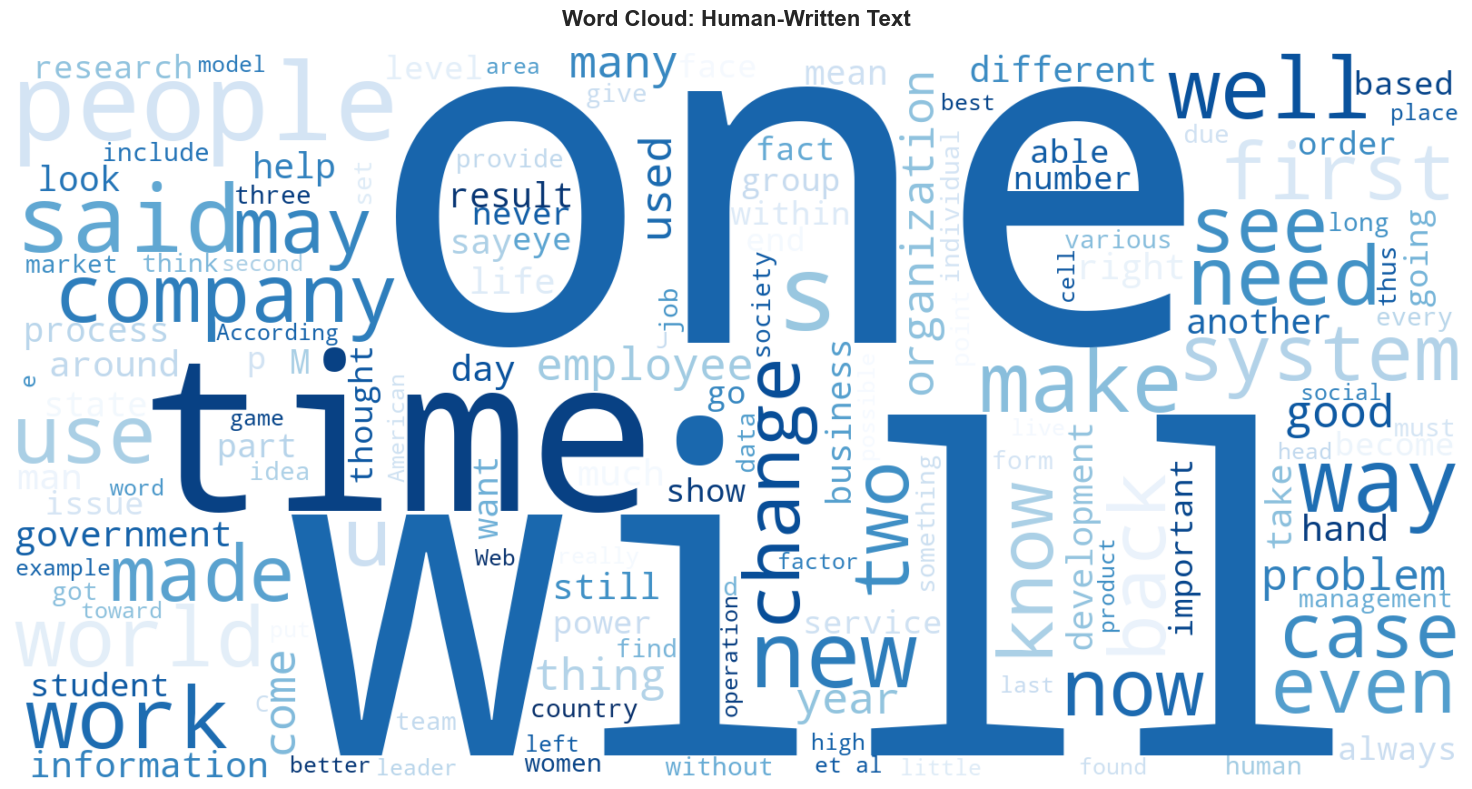

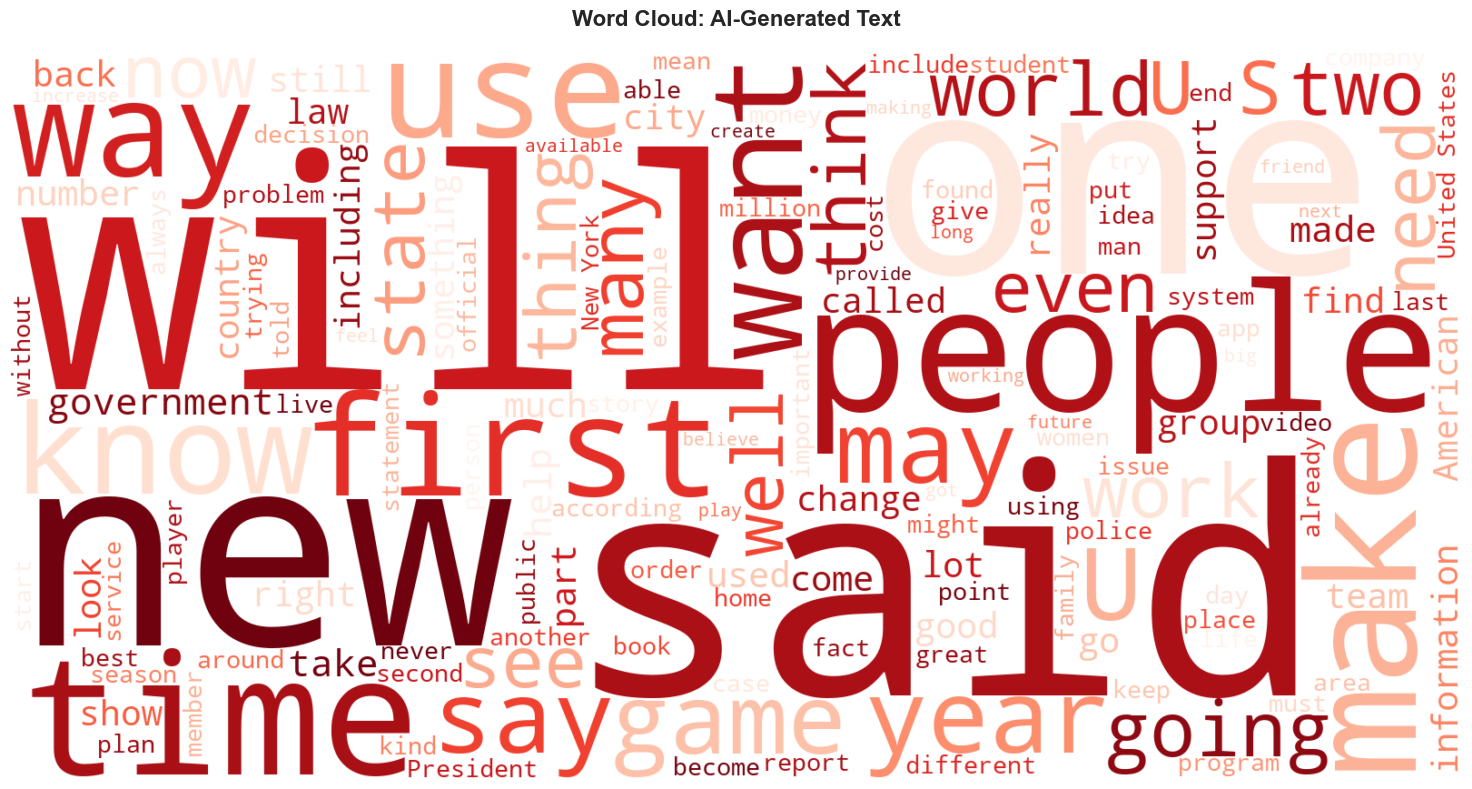

In [12]:
from wordcloud import WordCloud

# Word cloud for Human texts
human_texts = df_sample[df_sample['source'] == 'human']['text']
human_text_combined = ' '.join(human_texts.astype(str).head(1000)) #use subset to speed up

wordcloud_human = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    max_words=150,
    colormap='Blues',
    relative_scaling=0.5,
    min_font_size=10
).generate(human_text_combined)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_human, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Human-Written Text', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../visualizations/plots/wordcloud_human.png', dpi=300, bbox_inches='tight')
plt.show()

# Word cloud for AI texts
ai_texts = df_sample[df_sample['source'] == 'ai']['text']
ai_text_combined = ' '.join(ai_texts.astype(str).head(1000)) # Use subset to speed up

wordcloud_ai = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    max_words=150,
    colormap='Reds',
    relative_scaling=0.5,
    min_font_size=10
).generate(ai_text_combined)


plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_ai, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: AI-Generated Text', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../visualizations/plots/wordcloud_ai.png', dpi=300, bbox_inches='tight')
plt.show()

### Vocabulary Patterns (form word clouds)
- Human texts frequently use: time, will, one, change, make, back, system...
- AI texts frequently use: new, will, want, state, may, one, said, people...

### Questions for Further Investigation
1. Do sentence structures differ between human and AI?
2. Is vocabulary diversity different?
3. Are there stylistic markers (passive voice, transitions)?

# Deep Dataset Analysis & Quality Assessment

This section performs deeper statistical analysis and quality checks:
- Text characteristics (sentence length, word length, vocab diversity)
- Data quality assessment (duplicates, outliers, encoding issues)
- Comparative visualization between human & AI text

## Text Characteristics Analysis

Calculate and compare statistical features between human and AI text:
- Sentence length patterns
- Word length patterns
- Vocab Diversity (Type-Token Ratio)
- Punctuation usage

In [13]:
# Check unique values in source columm
print("Unique Values")
print(df_sample['source'].unique())
print("\nValue counts:")
print(df_sample['source'].value_counts())

Unique Values
['ai' 'human']

Value counts:
source
human    102814
ai        36438
Name: count, dtype: int64


In [14]:
import re 

def count_sentences(text):

    # Count sentences using regex pattern matching
    # More sophisticated than simple splitting on punctuation
    
    if pd.isna(text) or text.strip() == '':
        return 0
    
    # Pattern for sentence endings
    sentence_pattern = r'[.!?]+[\s]+(?=[A-Z])|[.!?]+$'
    sentences = re.split(sentence_pattern, str(text))
    sentences = [s.strip() for s in sentences if s.strip()]
    return len(sentences)

def count_words(text):
    # Count words in text.
    if pd.isna(text) or text.strip() == '':
        return 0
    return len(str(text).split())

def calculate_avg_word_length(text):
    # Calculate avg word length in characters.
    if pd.isna(text) or text.strip() == '':
        return 0
    words = str(text).split()
    if len(words) == 0:
        return 0
    return sum(len(word) for word in words) / len(words)

def calculate_avg_sentence_length(text):
    # calc avg number of words/sentence
    num_sentences = count_sentences(text)
    num_words = count_words(text)
    if num_sentences == 0:
        return 0
    return num_words / num_sentences

# Test the functions
test_text = "Hello world! How are you? I am fine."
print(f"Sentences:{count_sentences(test_text)}")
print(f"Words: {count_words(test_text)}")
print(f"Avg word length: {calculate_avg_word_length(test_text):.2f} characters")
print(f"Avg sentence length: {calculate_avg_sentence_length(test_text):.2f}")

Sentences:3
Words: 8
Avg word length: 3.62 characters
Avg sentence length: 2.67


In [15]:
# Calculate text statistics for all samples 
print("Calculating text statistics for all samples...")

df_sample['num_sentences'] = df_sample['text'].apply(count_sentences)
df_sample['num_words'] = df_sample['text'].apply(count_words)
df_sample['avg_word_length'] = df_sample['text'].apply(calculate_avg_word_length)
df_sample['avg_sentence_length'] = df_sample['text'].apply(calculate_avg_sentence_length)

print("Statistics calculated")
print("\nFirst few rows with new features:")
df_sample[['source', 'num_sentences', 'num_words', 'avg_word_length', 'avg_sentence_length']].head()

Calculating text statistics for all samples...
Statistics calculated

First few rows with new features:


,source,num_sentences,num_words,avg_word_length,avg_sentence_length
1184711,ai,29,410,4.280488,14.137931
75195,human,40,655,5.177099,16.375000
797701,human,16,161,4.366460,10.062500
331070,human,6,146,4.684932,24.333333
1024779,human,14,182,4.318681,13.000000


In [16]:
def calculate_vocabulary_diversity(text):
    # Calculate Type-Token Ratio (TTR): unique words / total words
    # Higher values indicate more diverse vocabulary
    
    if pd.isna(text) or text.strip() == '':
        return 0
    
    words = str(text).lower().split() # Convert to lowercase
    if len(words) == 0:
        return 0
    
    unique_words = len(set(words)) # set() removes duplicates
    total_words = len(words)
    
    return unique_words / total_words

print("Calculaing vocabulary diversity...")
df_sample['vocabulary_diversity'] = df_sample['text'].apply(calculate_vocabulary_diversity)

print("Vocabulary diversity calculated")
print("\nSample with all statistics:")
df_sample[['source', 'num_words', 'vocabulary_diversity']].head(10)

Calculaing vocabulary diversity...
Vocabulary diversity calculated

Sample with all statistics:


,source,num_words,vocabulary_diversity
1184711,ai,410,0.470732
75195,human,655,0.502290
797701,human,161,0.645963
331070,human,146,0.726027
1024779,human,182,0.736264
311358,human,81,0.814815
757576,human,198,0.621212
1376912,ai,242,0.417355
665600,human,205,0.575610
156738,human,585,0.449573


## Comparing Human vs AI Text Characteristics

Creating visualizations to compare statistical patterns between human and AI text.

In [17]:
# Comparative statistics
print("=" * 50)
print("COMPARITIVE STATISTICS: HUMAN vs AI TEXT")
print("=" * 50)

# Group by source and calculate summary statistics
comparison = df_sample.groupby('source')[['num_words', 'num_sentences', 'avg_word_length', 
                                          'avg_sentence_length', 'vocabulary_diversity']].describe()

print("\nHUMAN TEXT")
print(comparison.loc['human'])
print("\nAI TEXT")
print(comparison.loc['ai'])

COMPARITIVE STATISTICS: HUMAN vs AI TEXT

HUMAN TEXT
num_words             count    102814.000000
                      mean        407.643181
                      std         644.489653
                      min           8.000000
                      25%         173.000000
                      50%         189.000000
                      75%         393.000000
                      max       32530.000000
num_sentences         count    102814.000000
                      mean         21.582207
                      std          32.607058
                      min           1.000000
                      25%           8.000000
                      50%          13.000000
                      75%          21.000000
                      max        1609.000000
avg_word_length       count    102814.000000
                      mean          4.658543
                      std           0.704066
                      min           1.671875
                      25%           4.277174
  

## Data Quality Assessment

Checking for potential issues that could affect model performance

In [18]:
print("="* 50)
print("DATA QUALITY ASSESSMENT")
print("="* 50)


# Check for missing values
print("\nMissing Values")
print(df_sample.isnull().sum())

# Check for dupes
print("\nDuplicate Texts:")
duplicates = df_sample['text'].duplicated().sum()
print(f"Number of duplicate text: {duplicates}")
print(f"Percentage: {(duplicates/len(df_sample)*100):.2f}%")

# Check for empty or very short texts
print("\nExtremely short texts (potential quality issues)")
very_short = df_sample[df_sample['num_words'] < 10]
print(f"Texts with fewer than 10 words: {len(very_short)}")
print(f"Percentage: {(len(very_short)/len(df_sample)*100):.2f}%")

DATA QUALITY ASSESSMENT

Missing Values
source                  0
id                      0
text                    0
text_length             0
num_sentences           0
num_words               0
avg_word_length         0
avg_sentence_length     0
vocabulary_diversity    0
dtype: int64

Duplicate Texts:
Number of duplicate text: 111
Percentage: 0.08%

Extremely short texts (potential quality issues)
Texts with fewer than 10 words: 347
Percentage: 0.25%


In [19]:
# investigate short texts 0.25% of data
print("Examples of very short texts:")
print("="*50)

short_samples = df_sample[df_sample['num_words'] < 10].sample(min(10, len(very_short)))

for idx, row in short_samples.iterrows():
    print(f"\nSource: {row['source']}")
    print(f"Words: {row['num_words']}")
    print(f"Text: '{row['text'][:200]}'") # Show first 200 characters
    print("="*50)
    

Examples of very short texts:

Source: ai
Words: 9
Text: '  
The official state capital city of India is Delhi.

'

Source: human
Words: 9
Text: 'Mirrors are actually green ( very slightly ) .'

Source: ai
Words: 0
Text: '
'

Source: ai
Words: 1
Text: ')  '

Source: human
Words: 9
Text: 'Space is mirrored on both sides by Alt .'

Source: human
Words: 9
Text: 'Oxytocin , dopamine , serotonin is what happened .'

Source: human
Words: 9
Text: '19^th century steam engines meet 21^st century technology .'

Source: human
Words: 8
Text: 'All answers are directed to the judge .'

Source: ai
Words: 9
Text: 'You might want to check out this list: https://www.allrecipes.com/recipe/5178/stuffed-pigette-recipe-51718/.html'

Source: ai
Words: 8
Text: ' You're also right, it's called a home-reimbursement rule.

'


These short sentences are unnecessary as it only contributes 0.25% of overall data. Better to filter them out and clean our dataset.

In [20]:
# Document and filter out very short texts (< 10 words)
print("Filtering out very short texts (< 10 words)...")
print(f"Original sample size: {len(df_sample)}")

# Filter
df_sample_cleaned = df_sample[df_sample['num_words'] >= 10].copy()

print(f"After filtering {len(df_sample_cleaned)}")
print(f"Removed: {len(df_sample) - len(df_sample_cleaned)} samples ({((len(df_sample) - len(df_sample_cleaned))/len(df_sample)*100):.2f}%)")

# Verify class balance is maintained
print("\nClass distribution after filtering:")
print(df_sample_cleaned['source'].value_counts())
print("\nProportions:")
print(df_sample_cleaned['source'].value_counts(normalize=True))


# Calculate class imbalance ratio

human_count = df_sample_cleaned[df_sample_cleaned['source'] == 'human'].shape[0]
ai_count = df_sample_cleaned[df_sample_cleaned['source'] == 'ai'].shape[0]

ratio = human_count / ai_count

print("="*50)
print("CLASS IMBALANCE ANALYSIS")
print("="*50)
print(f"\nHuman samples: {human_count:,}")
print(f"AI samples: {ai_count:,}")
print(f"\nClass imbalance ratio (human:ai): {ratio:.2f}:1")
print(f"Ratio after filtering: {ratio:.2f}:1")
print(f"Change: {abs(ratio - imbalance_ratio):.4f} (minimal impact)")

Filtering out very short texts (< 10 words)...
Original sample size: 139252
After filtering 138905
Removed: 347 samples (0.25%)

Class distribution after filtering:
source
human    102768
ai        36137
Name: count, dtype: int64

Proportions:
source
human    0.739844
ai       0.260156
Name: proportion, dtype: float64
CLASS IMBALANCE ANALYSIS

Human samples: 102,768
AI samples: 36,137

Class imbalance ratio (human:ai): 2.84:1
Ratio after filtering: 2.84:1
Change: 0.0222 (minimal impact)


## Comparative Visualizations

Visual comparison of text characteristics between human and AI-generated text.

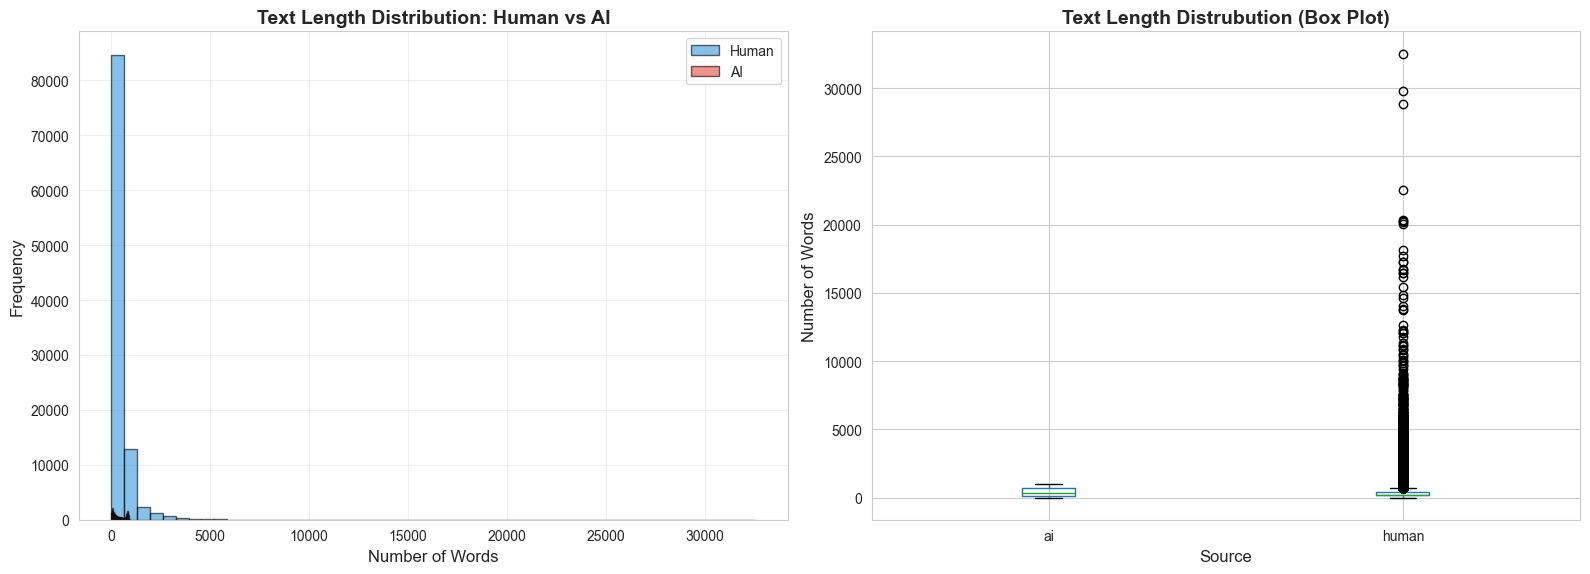

In [21]:
# 1. Text length distribution comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
axes[0].hist(df_sample_cleaned[df_sample_cleaned['source'] == 'human']['num_words'],
             bins=50, alpha=0.6, label='Human', color='#3498db', edgecolor='black')
axes[0].hist(df_sample_cleaned[df_sample_cleaned['source'] == 'ai']['num_words'],
             bins=50, alpha=0.6, label='AI', color='#e74c3c', edgecolor='black')
axes[0].set_xlabel('Number of Words', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Text Length Distribution: Human vs AI', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
df_sample_cleaned.boxplot(column='num_words', by='source', ax=axes[1])
axes[1].set_xlabel('Source', fontsize=12)
axes[1].set_ylabel('Number of Words', fontsize=12)
axes[1].set_title('Text Length Distrubution (Box Plot)', fontsize=14, fontweight='bold')
plt.suptitle('') # Remove the automatic title

plt.tight_layout()
plt.savefig('../visualizations/plots/text_length_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

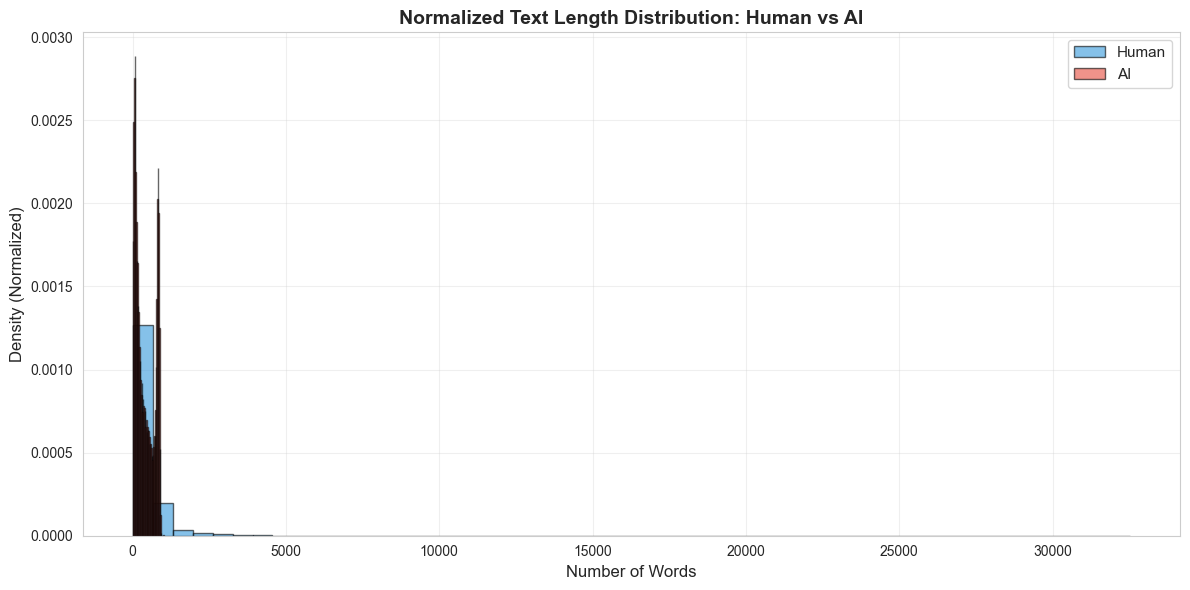

In [22]:
# 2. Normalized text length distribution (better for comparison)
fig, ax = plt.subplots(figsize=(12, 6))

# get data for each source
human_words = df_sample_cleaned[df_sample_cleaned['source'] == 'human']['num_words']
ai_words = df_sample_cleaned[df_sample_cleaned['source'] == 'ai']['num_words']

# create normalized histograms
ax.hist(human_words, bins=50, alpha=0.6, label='Human',
        color='#3498db', edgecolor='black', density=True)
ax.hist(ai_words, bins=50, alpha=0.6, label='AI',
        color='#e74c3c', edgecolor='black', density=True)

ax.set_xlabel('Number of Words', fontsize=12)
ax.set_ylabel('Density (Normalized)', fontsize=12)
ax.set_title("Normalized Text Length Distribution: Human vs AI", fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../visualizations/plots/text_length_normalized.png', dpi=300, bbox_inches='tight')
plt.show()

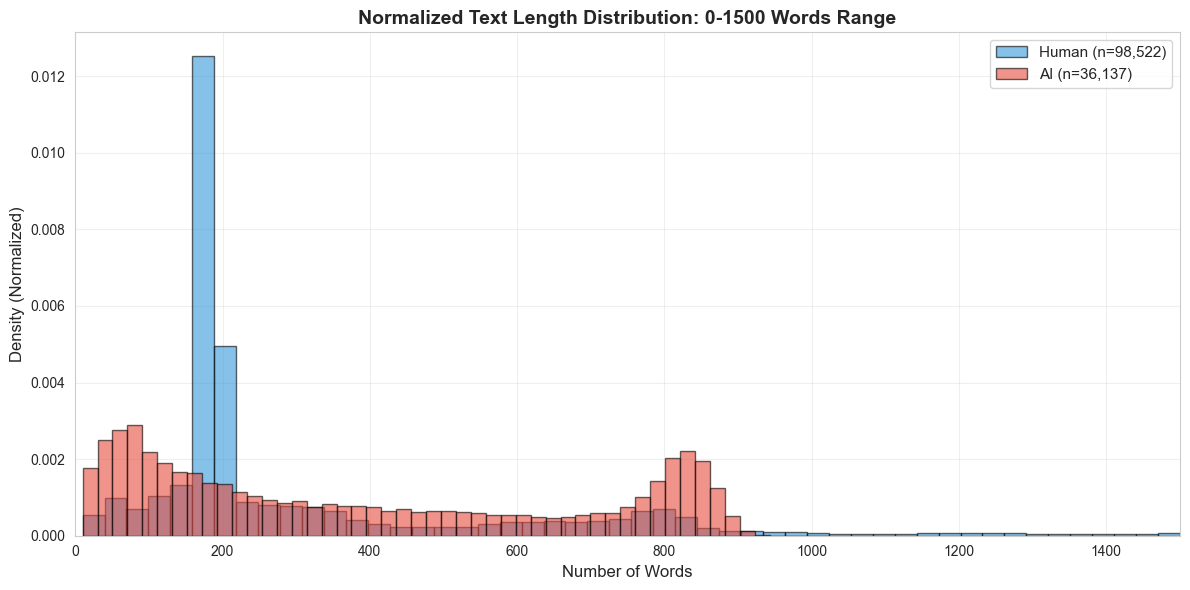

In [23]:
# 3. Zoomedin comparison (0-1500 words only)
fig, ax = plt.subplots(figsize=(12, 6))

# Filter to 0-1500 word range
human_words_filtered = human_words[human_words <= 1500]
ai_words_filtered = ai_words[ai_words <= 1500]


ax.hist(human_words_filtered, bins=50, alpha=0.6, label=f'Human (n={len(human_words_filtered):,})',
        color='#3498db', edgecolor='black', density=True)
ax.hist(ai_words_filtered, bins=50, alpha=0.6, label=f'AI (n={len(ai_words_filtered):,})',
        color='#e74c3c', edgecolor='black', density=True)

ax.set_xlabel('Number of Words', fontsize=12)
ax.set_ylabel('Density (Normalized)', fontsize=12)
ax.set_title("Normalized Text Length Distribution: 0-1500 Words Range", fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(alpha=0.3)
ax.set_xlim(0, 1500)

plt.tight_layout()
plt.savefig('../visualizations/plots/text_length_zoomed.png', dpi=300, bbox_inches='tight')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

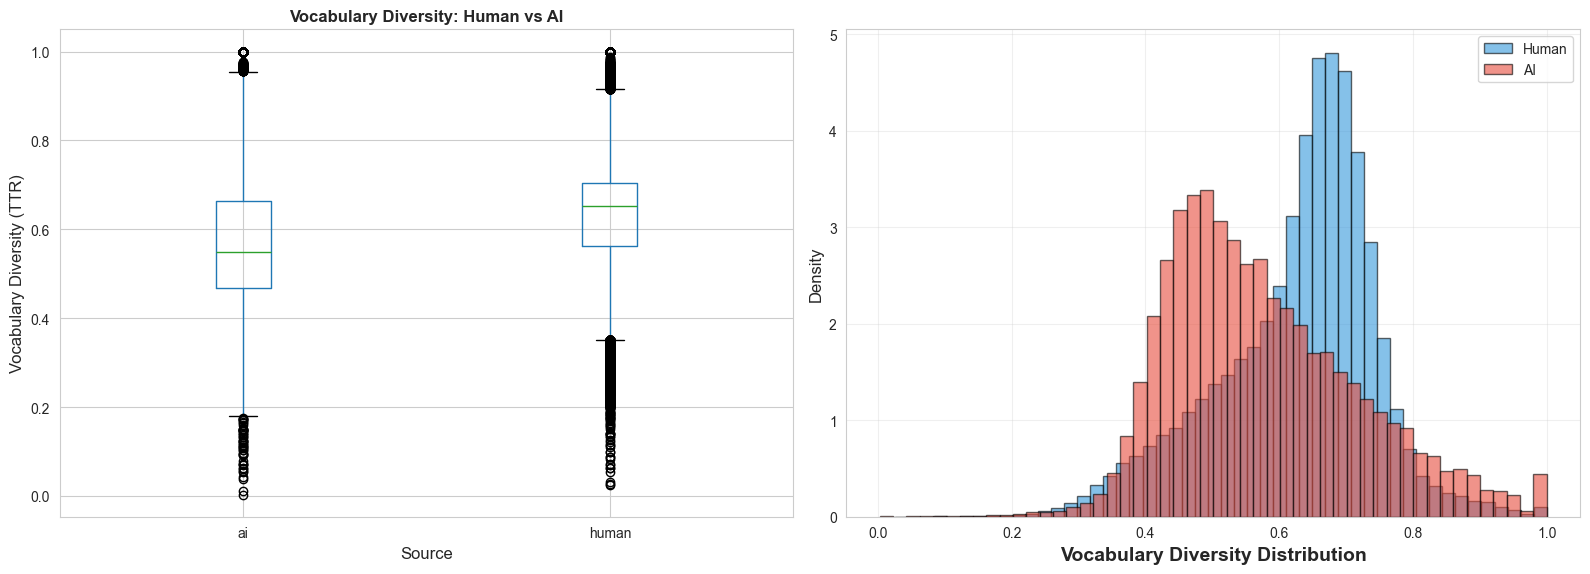

In [27]:
# 4 Vocabulary Diversity Comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot
df_sample_cleaned.boxplot(column='vocabulary_diversity', by='source', ax=axes[0])
axes[0].set_xlabel('Source', fontsize=12)
axes[0].set_ylabel('Vocabulary Diversity (TTR)', fontsize=12)
axes[0].set_title('Vocabulary Diversity: Human vs AI', fontsize=12, fontweight='bold')
plt.suptitle('')

# Histogram
axes[1].hist(df_sample_cleaned[df_sample_cleaned['source'] == 'human']['vocabulary_diversity'],
            bins=50, alpha=0.6, label='Human', color='#3498db', edgecolor='black', density=True)
axes[1].hist(df_sample_cleaned[df_sample_cleaned['source'] == 'ai']['vocabulary_diversity'],
            bins=50, alpha=0.6, label='AI', color='#e74c3c', edgecolor='black', density=True)
axes[1].set_xlabel('Vocabulary Diversity (TTR)', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].set_xlabel('Vocabulary Diversity Distribution', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)


plt.tight_layout()
plt.savefig('../visualizations/plots/vocabulary_diversity_comparison.png', dpi=300, bbox_inches='tight')
plt.show

In [ ]:
# 5 Sentence length comparison
fig, ax = plt.subplots(1, 2, figsize=(1,6))